In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv('Traffic_Crashes_Resulting_in_Injury_20250306.csv')
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\1484242852.py:1: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Traffic_Crashes_Resulting_in_Injury_20250306.csv')


,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Russian Hill,2.0,CENTRAL,6.0,6.0,32.0,98.0,98.0


In [103]:
df.columns

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [104]:
df_selected = df[['tb_latitude','tb_longitude','collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party_at_fault','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc']]
df_selected.head()

,tb_latitude,tb_longitude,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,...,control_device,number_killed,number_injured,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc
0,37.734019,-122.388046,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,...,NaN,0.0,1,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN
1,37.762886,-122.428578,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,...,NaN,0.0,1,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN
2,37.768636,-122.454858,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,...,NaN,0.0,2,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN
3,37.780363,-122.399080,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,...,Functioning,0.0,1,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn
4,37.804146,-122.425110,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,...,Not Stated,0.0,1,NaN,Driver,North,Not Stated,Pedestrian,West,Not Stated


In [105]:
df_selected.columns

Index(['tb_latitude', 'tb_longitude', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'primary_rd', 'secondary_rd',
       'distance', 'direction', 'weather_1', 'collision_severity',
       'type_of_collision', 'mviw', 'ped_action', 'road_surface',
       'road_cond_1', 'lighting', 'dph_col_grp_description', 'control_device',
       'number_killed', 'number_injured', 'party_at_fault', 'party1_type',
       'party1_dir_of_travel', 'party1_move_pre_acc', 'party2_type',
       'party2_dir_of_travel', 'party2_move_pre_acc'],
      dtype='object')

In [106]:
df_selected['control_device'].value_counts()

control_device
Functioning        39459
Not Stated           911
Not Functioning      189
Obscured              45
Name: count, dtype: int64

In [107]:
df_selected['mviw'].value_counts()

mviw
Other Motor Vehicle               28121
Pedestrian                        14373
Bicycle                            8341
Fixed Object                       2737
Parked Motor Vehicle               2613
Non-Collision                      1429
Not Stated                         1365
Other Object                       1173
Motor Vehicle on Other Roadway      912
Train                               140
Animal                               25
Name: count, dtype: int64

In [108]:
df_selected['party1_dir_of_travel'].value_counts()

party1_dir_of_travel
South         15350
East          15009
North         14910
West          14146
Not Stated     1803
Name: count, dtype: int64

In [109]:
df_selected['ped_action'].value_counts()

ped_action
No Pedestrian Involved                       45655
Crossing in Crosswalk at Intersection         8805
Crossing Not in Crosswalk                     3121
In Road, Including Shoulder                   1900
Not in Road                                    820
Not Stated                                     695
Crossing in Crosswalk Not at Intersection      209
Approaching/Leaving School Bus                  13
Not In Road                                     11
Name: count, dtype: int64

In [110]:
df_selected['dph_col_grp_description'].value_counts()

dph_col_grp_description
Vehicle(s) Only Involved                    36096
Vehicle-Pedestrian                          14789
Vehicle-Bicycle                              8241
Bicycle Only                                 1107
Bicycle-Pedestrian                            481
Bicycle-Parked Car                            445
Pedestrian Only or Pedestrian-Parked Car       33
Vehicle-Bicycle-Pedestrian                     18
Unknown/Not Stated                             15
Bicycle-Unknown/Not Stated                      3
Name: count, dtype: int64

In [111]:
df_selected['primary_rd'].value_counts()

primary_rd
MISSION ST                        2638
MARKET ST                         2179
VAN NESS AVE                      1482
GEARY BLVD                        1178
03RD ST                           1153
                                  ... 
COLIN P KELLY JR ST                  1
HALLAM ST                            1
SERGEANT JOHN V YOUNG ST             1
ARBOR ST                             1
491 BAY SHORE BLVD PARKING LOT       1
Name: count, Length: 1260, dtype: int64

In [112]:
df_selected['secondary_rd'].value_counts()

secondary_rd
MISSION ST     1007
FOLSOM ST       692
HARRISON ST     640
MARKET ST       621
16TH ST         612
               ... 
MELBA AVE         1
MONTCALM ST       1
ECKER ST          1
BAYWOOD CT        1
KENNY ALY         1
Name: count, Length: 1702, dtype: int64

In [113]:
df_selected.isna().sum()

tb_latitude                  167
tb_longitude                 167
collision_date                 0
collision_time                60
accident_year                  0
month                          0
day_of_week                    9
primary_rd                     0
secondary_rd                 142
distance                      79
direction                      1
weather_1                      0
collision_severity             0
type_of_collision              0
mviw                           0
ped_action                     0
road_surface                   0
road_cond_1                    0
lighting                       0
dph_col_grp_description        1
control_device             20625
number_killed                  3
number_injured                 0
party_at_fault              6066
party1_type                   11
party1_dir_of_travel          11
party1_move_pre_acc           10
party2_type                 4386
party2_dir_of_travel        4384
party2_move_pre_acc         4383
dtype: int

In [114]:
df_selected['tb_latitude'].value_counts()

tb_latitude
37.771886    88
37.777300    70
37.769815    70
37.780791    66
37.795737    64
             ..
37.760059     1
37.769743     1
37.769988     1
37.746262     1
37.731788     1
Name: count, Length: 36257, dtype: int64

In [115]:
tb_latitude_mean=df_selected['tb_latitude'].mean()
tb_latitude_mean

37.765793636010976

In [116]:
df_selected['tb_latitude']=df_selected['tb_latitude'].fillna(tb_latitude_mean)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2386062642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['tb_latitude']=df_selected['tb_latitude'].fillna(tb_latitude_mean)


In [117]:
df_selected.isna().sum()

tb_latitude                    0
tb_longitude                 167
collision_date                 0
collision_time                60
accident_year                  0
month                          0
day_of_week                    9
primary_rd                     0
secondary_rd                 142
distance                      79
direction                      1
weather_1                      0
collision_severity             0
type_of_collision              0
mviw                           0
ped_action                     0
road_surface                   0
road_cond_1                    0
lighting                       0
dph_col_grp_description        1
control_device             20625
number_killed                  3
number_injured                 0
party_at_fault              6066
party1_type                   11
party1_dir_of_travel          11
party1_move_pre_acc           10
party2_type                 4386
party2_dir_of_travel        4384
party2_move_pre_acc         4383
dtype: int

In [118]:
tb_longtitude_mean=df_selected['tb_longitude'].mean()
tb_longtitude_mean

-122.42866830738393

In [119]:
df_selected['tb_longitude']=df_selected['tb_longitude'].fillna(tb_longtitude_mean)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\892257539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['tb_longitude']=df_selected['tb_longitude'].fillna(tb_longtitude_mean)


In [120]:
df_selected['collision_time'].value_counts()


collision_time
18:00:00    289
16:00:00    273
14:00:00    272
15:00:00    259
14:30:00    244
           ... 
04:38:00      2
04:44:00      2
04:51:00      2
04:41:00      2
03:49:00      1
Name: count, Length: 1440, dtype: int64

In [121]:
df_selected['collision_time'].fillna(method='ffill',inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2826741115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['collision_time'].fillna(method='ffill',inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2826741115.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_selected['collision_time'].fillna(method='ffill',inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2826741115.py:1: SettingWithCopy

In [122]:
df_selected['day_of_week'].value_counts()

day_of_week
Friday       9589
Wednesday    9207
Thursday     9100
Tuesday      9099
Saturday     8410
Monday       8295
Sunday       7520
Name: count, dtype: int64

In [123]:
day_of_week_mode=df_selected['day_of_week'].mode()
day_of_week_mode

0    Friday
Name: day_of_week, dtype: object

In [124]:
df_selected['day_of_week']=df_selected['day_of_week'].fillna(day_of_week_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\1658647565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['day_of_week']=df_selected['day_of_week'].fillna(day_of_week_mode[0])


In [125]:
df_selected['control_device'].value_counts()

control_device
Functioning        39459
Not Stated           911
Not Functioning      189
Obscured              45
Name: count, dtype: int64

In [126]:
df_selected['party_at_fault'].value_counts()

party_at_fault
1.0    54488
2.0      627
3.0       41
4.0        5
5.0        2
Name: count, dtype: int64

In [127]:
mean_at_fault=df_selected['party_at_fault'].mean()
mean_at_fault

1.0132697641535087

In [128]:
df_selected['collision_severity'].value_counts()

collision_severity
Injury (Complaint of Pain)    38946
Injury (Other Visible)        17406
Injury (Severe)                4294
Fatal                           582
Medical                           1
Name: count, dtype: int64

In [129]:
df_selected['party_at_fault']=df_selected['party_at_fault'].fillna(mean_at_fault)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2126519801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party_at_fault']=df_selected['party_at_fault'].fillna(mean_at_fault)


In [130]:
df_selected['number_killed'].value_counts()

number_killed
0.0    60641
1.0      573
2.0       10
3.0        1
4.0        1
Name: count, dtype: int64

In [150]:
df_selected.isna().sum()

tb_latitude                    0
tb_longitude                   0
collision_date                 0
collision_time                 0
accident_year                  0
month                          0
day_of_week                    0
primary_rd                     0
secondary_rd                 142
distance                      79
direction                      1
weather_1                      0
collision_severity             0
type_of_collision              0
mviw                           0
ped_action                     0
road_surface                   0
road_cond_1                    0
lighting                       0
dph_col_grp_description        1
control_device             20625
number_killed                  3
number_injured                 0
party_at_fault                 0
party1_type                   11
party1_dir_of_travel          11
party1_move_pre_acc            0
party2_type                    0
party2_dir_of_travel           0
party2_move_pre_acc         4383
dtype: int

In [132]:
df_selected['party2_type'].value_counts()

party2_type
Driver            37829
Pedestrian        10163
Bicyclist          5383
Parked Vehicle     2748
Other               701
Not Stated           19
Name: count, dtype: int64

In [138]:
party2_type_mode=df_selected['party2_type'].mode([0])
party2_type_mode

0    Driver
Name: party2_type, dtype: object

In [139]:
df_selected['party2_type']=df_selected['party2_type'].fillna(party2_type_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\1424557625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party2_type']=df_selected['party2_type'].fillna(party2_type_mode[0])


In [141]:
df_selected['party2_dir_of_travel'].value_counts()

party2_dir_of_travel
East          13848
North         13634
South         13381
West          12909
Not Stated     3073
Name: count, dtype: int64

In [143]:
dir_mode=df_selected['party2_dir_of_travel'].mode()
dir_mode

0    East
Name: party2_dir_of_travel, dtype: object

In [144]:
df_selected['party2_dir_of_travel']=df_selected['party2_dir_of_travel'].fillna(dir_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2194133743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party2_dir_of_travel']=df_selected['party2_dir_of_travel'].fillna(dir_mode[0])


In [146]:
df_selected['party1_move_pre_acc'].value_counts()

party1_move_pre_acc
Proceeding Straight                       31778
Making Left Turn                          10685
Making Right Turn                          3805
Changing Lanes                             2093
Other                                      1760
Entering Traffic                           1619
Not Stated                                 1349
Backing                                    1305
Stopped In Road                            1211
Making U Turn                              1115
Parked                                      746
Slowing/Stopping                            662
Passing Other Vehicle                       626
Stopped                                     488
Traveling Wrong Way                         455
Ran Off Road                                396
Parking Maneuver                            347
Other Unsafe Turning                        336
Crossed Into Opposing Lane                  201
Merging                                     164
Crossed Into Opposin

In [148]:
move_acc_mode=df['party1_move_pre_acc'].mode()
move_acc_mode

0    Proceeding Straight
Name: party1_move_pre_acc, dtype: object

In [149]:
df_selected['party1_move_pre_acc']=df_selected['party1_move_pre_acc'].fillna(move_acc_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2173352038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party1_move_pre_acc']=df_selected['party1_move_pre_acc'].fillna(move_acc_mode[0])


In [188]:
df_selected.isna().sum()

tb_latitude                    0
tb_longitude                   0
collision_date                 0
collision_time                 0
accident_year                  0
month                          0
day_of_week                    0
primary_rd                     0
secondary_rd                   0
distance                       0
direction                      0
weather_1                      0
collision_severity             0
type_of_collision              0
mviw                           0
ped_action                     0
road_surface                   0
road_cond_1                    0
lighting                       0
dph_col_grp_description        0
control_device             20625
number_killed                  0
number_injured                 0
party_at_fault                 0
party1_type                    0
party1_dir_of_travel           0
party1_move_pre_acc            0
party2_type                    0
party2_dir_of_travel           0
party2_move_pre_acc            0
dtype: int

In [153]:
move_acc_2_mode=df['party2_move_pre_acc'].mode()
move_acc_2_mode

0    Proceeding Straight
Name: party2_move_pre_acc, dtype: object

In [154]:
df_selected['party2_move_pre_acc']=df_selected['party2_move_pre_acc'].fillna(move_acc_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\4189641890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party2_move_pre_acc']=df_selected['party2_move_pre_acc'].fillna(move_acc_mode[0])


In [156]:
df_selected['distance'].value_counts()

distance
0.0       33891
10.0        625
5.0         574
20.0        553
6.0         536
          ...  
5280.0        1
2216.0        1
3280.0        1
621.0         1
714.0         1
Name: count, Length: 870, dtype: int64

In [158]:
distance_mean=df_selected['distance'].mean()
distance_mean

55.96129190515127

In [159]:
df_selected['distance']=df_selected['distance'].fillna(distance_mean)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\210721448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['distance']=df_selected['distance'].fillna(distance_mean)


In [161]:
df_selected['secondary_rd'].value_counts()

secondary_rd
MISSION ST     1007
FOLSOM ST       692
HARRISON ST     640
MARKET ST       621
16TH ST         612
               ... 
MELBA AVE         1
MONTCALM ST       1
ECKER ST          1
BAYWOOD CT        1
KENNY ALY         1
Name: count, Length: 1702, dtype: int64

In [163]:
secondary_mode=df_selected['secondary_rd'].mode()
secondary_mode


0    MISSION ST
Name: secondary_rd, dtype: object

In [164]:
df_selected['secondary_rd']=df_selected['secondary_rd'].fillna(secondary_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2550687336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['secondary_rd']=df_selected['secondary_rd'].fillna(secondary_mode[0])


In [166]:
df_selected['direction'].value_counts()

direction
Not Stated    33893
South          7404
West           6775
East           6711
North          6444
North Nor         1
Name: count, dtype: int64

In [168]:
direction_mode=df_selected['direction'].mode()
direction_mode

0    Not Stated
Name: direction, dtype: object

In [169]:
df_selected['direction']=df_selected['direction'].fillna(direction_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\4270947099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['direction']=df_selected['direction'].fillna(direction_mode[0])


In [171]:
df_selected['dph_col_grp_description'].value_counts()

dph_col_grp_description
Vehicle(s) Only Involved                    36096
Vehicle-Pedestrian                          14789
Vehicle-Bicycle                              8241
Bicycle Only                                 1107
Bicycle-Pedestrian                            481
Bicycle-Parked Car                            445
Pedestrian Only or Pedestrian-Parked Car       33
Vehicle-Bicycle-Pedestrian                     18
Unknown/Not Stated                             15
Bicycle-Unknown/Not Stated                      3
Name: count, dtype: int64

In [173]:
dph_mode=df_selected['dph_col_grp_description'].mode()
dph_mode

0    Vehicle(s) Only Involved
Name: dph_col_grp_description, dtype: object

In [174]:
df_selected['dph_col_grp_description']=df_selected['dph_col_grp_description'].fillna(dph_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\1128037912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['dph_col_grp_description']=df_selected['dph_col_grp_description'].fillna(dph_mode[0])


In [176]:
df_selected['number_killed'].value_counts()

number_killed
0.0    60641
1.0      573
2.0       10
3.0        1
4.0        1
Name: count, dtype: int64

In [178]:
killed_mean=df_selected['number_killed'].mean()
killed_mean

0.009799758272629275

In [179]:
df_selected['number_killed']=df_selected['number_killed'].fillna(killed_mean)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\34081918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['number_killed']=df_selected['number_killed'].fillna(killed_mean)


In [181]:
df_selected['party1_type'].value_counts()

party1_type
Driver            50086
Bicyclist          4973
Pedestrian         4816
Other               948
Parked Vehicle      367
Not Stated           27
Bicycle               1
Name: count, dtype: int64

In [182]:
type_mode=df_selected['party1_type'].mode()
type_mode

0    Driver
Name: party1_type, dtype: object

In [183]:
df_selected['party1_type']=df_selected['party1_type'].fillna(type_mode[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\2222748846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party1_type']=df_selected['party1_type'].fillna(type_mode[0])


In [184]:
df_selected['party1_dir_of_travel'].value_counts()

party1_dir_of_travel
South         15350
East          15009
North         14910
West          14146
Not Stated     1803
Name: count, dtype: int64

In [186]:
travel_1=df_selected['party1_dir_of_travel'].mode()
travel_1

0    South
Name: party1_dir_of_travel, dtype: object

In [187]:
df_selected['party1_dir_of_travel']=df_selected['party1_dir_of_travel'].fillna(travel_1[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\305964846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['party1_dir_of_travel']=df_selected['party1_dir_of_travel'].fillna(travel_1[0])


In [191]:
df_selected=df_selected.drop(columns="control_device",axis=1)
df_selected.head()

,tb_latitude,tb_longitude,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,...,dph_col_grp_description,number_killed,number_injured,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc
0,37.734019,-122.388046,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,...,Vehicle(s) Only Involved,0.0,1,1.01327,Driver,West,Proceeding Straight,Driver,East,Proceeding Straight
1,37.762886,-122.428578,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,...,Bicycle Only,0.0,1,1.01327,Bicyclist,East,Proceeding Straight,Driver,East,Proceeding Straight
2,37.768636,-122.454858,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,...,Vehicle(s) Only Involved,0.0,2,1.01327,Driver,North,Proceeding Straight,Driver,East,Proceeding Straight
3,37.780363,-122.399080,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,...,Vehicle-Bicycle,0.0,1,1.01327,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn
4,37.804146,-122.425110,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,...,Vehicle-Pedestrian,0.0,1,1.01327,Driver,North,Not Stated,Pedestrian,West,Not Stated


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12148\1300064767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='collision_severity', data=df_selected, palette='coolwarm')


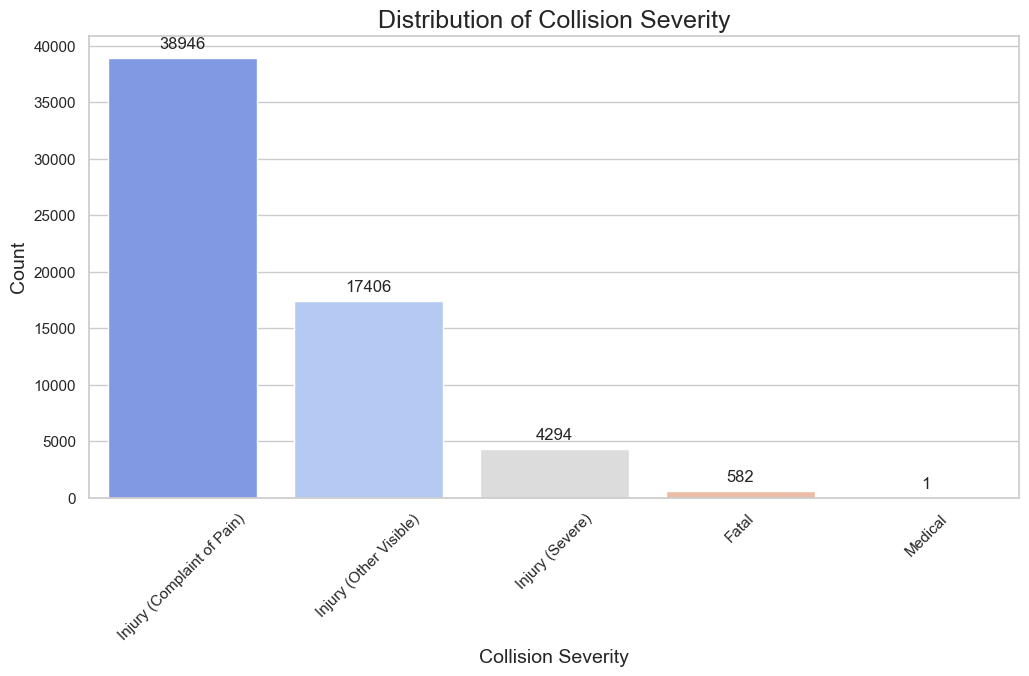

In [ ]:

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='collision_severity', data=df_selected, palette='coolwarm')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Collision Severity', fontsize=18)
plt.xlabel('Collision Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()